In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [156]:
df_train = pd.read_csv('/Users/muzafarov/Desktop/MyEducation/ML_OE/Bank_Personal_Loan_Modelling_train.csv')
df_test = pd.read_csv('/Users/muzafarov/Desktop/MyEducation/ML_OE/Bank_Personal_Loan_Modelling_reserved.csv')

In [157]:
df_train = df_train.drop(columns=['ID','ZIP Code'])
df_test = df_test.drop(columns=['ID','ZIP Code'])


In [158]:
df_train.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,60,36,89,2,2.8,1,0,0,0,0,1,0
1,44,19,30,1,0.5,3,0,0,0,0,1,0
2,26,0,19,1,0.1,2,121,0,0,0,1,0
3,34,9,41,2,0.1,1,161,0,0,0,1,1
4,56,32,51,4,1.5,1,0,0,0,0,0,0


In [159]:
df_test.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,64,39,23,3,0.5,1,0,1,0,0,0
1,33,9,184,2,4.8,2,0,0,0,0,0
2,58,33,22,3,0.2,1,0,0,0,1,0
3,54,24,61,4,2.0,3,0,1,0,1,0
4,55,29,49,2,0.8,3,220,0,0,0,1


In [160]:
df_train['Experience'].sort_values()

1946    -3
3722    -3
3142    -3
1856    -3
3871    -2
        ..
3167    42
646     42
3250    43
3700    43
1197    43
Name: Experience, Length: 4000, dtype: int64

In [161]:
df_train['Experience'] = df_train['Experience'] + 3

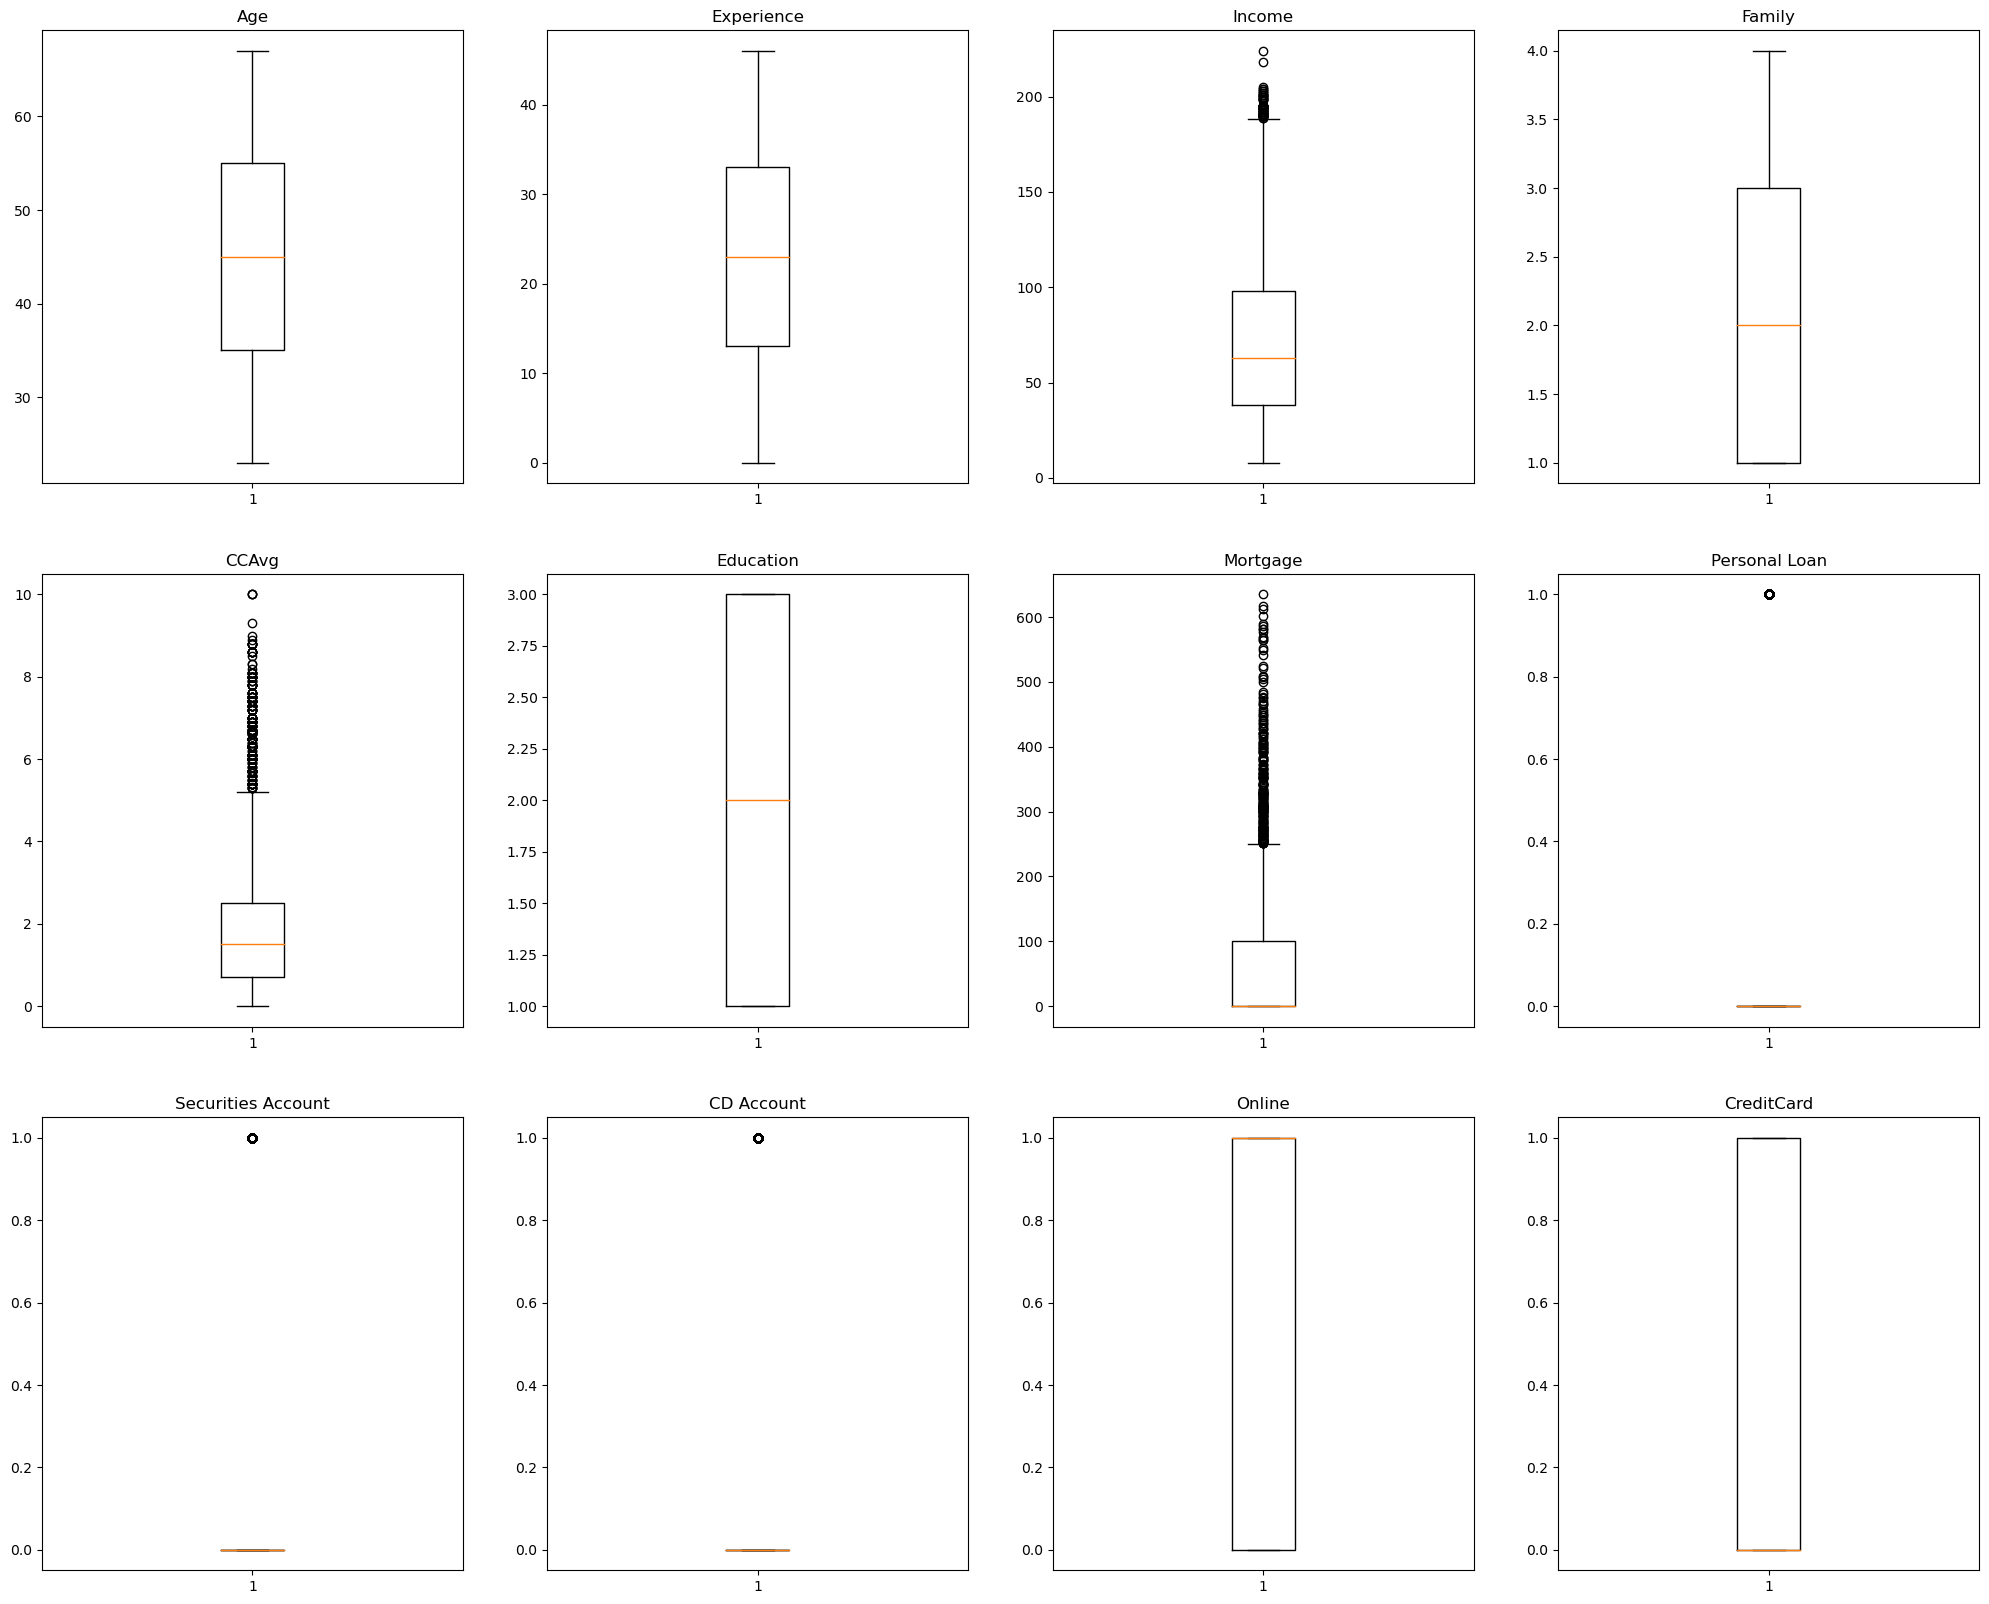

In [162]:
for ax, num_col_name in zip(plt.subplots(3, 4, figsize=(25, 20))[1].flatten(), df_train.columns):
  ax.set_title(num_col_name)
  ax.boxplot(df_train[num_col_name])

In [163]:
df_1 = (df_train['Mortgage'] - df_train['Mortgage'].mean())/np.std(df_train['Mortgage'])

z_score = zscore(df_1, axis=0, ddof=0, nan_policy='propagate')
len(z_score[z_score>3])

arr_idxs = np.where(abs(z_score) > 3)[0]
#df_train = df_train.drop(labels=arr_idxs, axis=0)

In [164]:
df_1 = (df_train['CCAvg'] - df_train['CCAvg'].mean())/np.std(df_train['CCAvg'])

z_score = zscore(df_1, axis=0, ddof=0, nan_policy='propagate')
len(z_score[z_score>3])

arr_idxs2 = np.where(abs(z_score) > 3)[0]

arr_idxs = set(arr_idxs)
arr_idxs2 = set(arr_idxs2)
intersection = arr_idxs | arr_idxs2

df_train = df_train.drop(labels=intersection, axis=0)

## Модель

In [165]:
X_train = df_train.drop(columns='Personal Loan')
y_train = df_train['Personal Loan']

X_test = df_test

In [166]:
# tuned_parameters = [{criterion: [“gini”, “entropy”, “log_loss”], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000], 'class_weight': [None, 'balanced'], 'random_state':[21]}]

# cv = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, refit=True, verbose=3)

In [167]:
DTC = DecisionTreeClassifier(random_state=7, criterion='gini', class_weight='balanced',splitter='best')
DTC.fit(X_train,y_train)
pred = DTC.predict(X_test)
print(list(pred))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 